# HW1 - KNN 

We will be importing the required libraries first

In [224]:
# Importing the required libraries
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

We will then define the knn function which accepts the training data, test data and k as input and returns the accuracy vector and the average accuracy. This cell also has some helper functions to calculate the Euclidean distance and getting the predicted label from the list of knn distances. 

In [220]:
# Returns an accuracy vector and the average accuracy for all the classes
def kNN(images_train, labels_train, images_test, labels_test, k):
    # Initialize variables
    prediction_score = np.zeros(10)
    
    # Loop over all test samples to find the knn distance labels
    for current_test in range(len(images_test)):
        # Find the first k indexes in the knn distance matrix and find the corresponding labels
        knn_labels = labels_train[np.argpartition(np.sum(np.square(images_train-images_test[current_test]), axis=1), k)[0: k]]
        # Update the Prediction score
        prediction_score[labels_test[current_test]] += (np.bincount(knn_labels).argmax() == labels_test[current_test])
    
    return prediction_score/np.bincount(labels_test), np.sum(prediction_score) / len(images_test)


We will then load the dataset

In [221]:
# Loading the data from external file
data = loadmat('MNIST_digit_data.mat')
images_train, images_test, labels_train, labels_test = \
    data['images_train'], data['images_test'], data['labels_train'], data['labels_test']

This is followed by preprocessing the data

In [222]:
# Preprocessing the data to make it suitable for prediction
# Set seed to make the permutation same across all machines
np.random.seed(1)

# randomly permute data points
indexes = np.random.permutation(images_train.shape[0])
images_train = images_train[indexes]
labels_train = labels_train[indexes]
indexes = np.random.permutation(images_test.shape[0])
images_test = images_test[indexes]
labels_test = labels_test[indexes]

# Changing label arrays to 1-D
labels_train_1d = labels_train.flatten()
labels_test_1d = labels_test.flatten()

Once the data is preprocessed, we will move towards a test run for out algorithm. We see the graph for k=1.

For k = 1, test_size = 1000 and training_size =  29  : Average accuracy -  0.583
For k = 1, test_size = 1000 and training_size =  57  : Average accuracy -  0.659
For k = 1, test_size = 1000 and training_size =  109  : Average accuracy -  0.739
For k = 1, test_size = 1000 and training_size =  208  : Average accuracy -  0.777
For k = 1, test_size = 1000 and training_size =  396  : Average accuracy -  0.831
For k = 1, test_size = 1000 and training_size =  756  : Average accuracy -  0.859
For k = 1, test_size = 1000 and training_size =  1442  : Average accuracy -  0.879
For k = 1, test_size = 1000 and training_size =  2750  : Average accuracy -  0.914
For k = 1, test_size = 1000 and training_size =  5244  : Average accuracy -  0.938
For k = 1, test_size = 1000 and training_size =  10000  : Average accuracy -  0.953


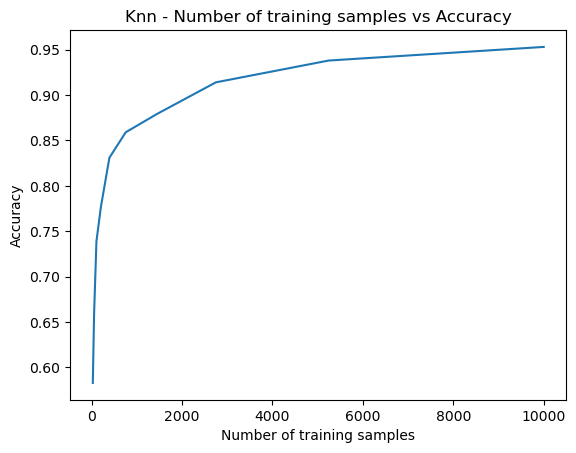

In [152]:
# Testing the knn classifier with k=1, training image size varying from 30 to 10000, and 1000 test images
# Initialize plot
plt.title('Knn - Number of training samples vs Accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
# Initialize variables
training_size_list = np.logspace(start=np.log10(30), stop=4, num=10, dtype = int) # Training dataset size
average_accuracy_list = [] # List of average accuracies for various training dataset sizes
for training_size in training_size_list:
    acc_vec, avg_acc = kNN(images_train[0:training_size,], labels_train_1d[0:training_size], \
                           images_test[0:1000,], labels_test_1d[0:1000], 1)
    average_accuracy_list.append(avg_acc)
    print("For k = 1, test_size = 1000 and training_size = ",training_size, \
         ' : Average accuracy - ', avg_acc)

# Render plot
plt.plot(training_size_list, average_accuracy_list, label='k = 1')
plt.show()

We see above that the our algorithm works for k=1. We will now run the algorithm for other Ks and see how it affects the accuracy.

For k =  1 , test_size = 1000 : Average accuracy list -  [0.583, 0.659, 0.739, 0.777, 0.831, 0.859, 0.879, 0.914, 0.938, 0.953]
For k =  2 , test_size = 1000 : Average accuracy list -  [0.529, 0.576, 0.684, 0.732, 0.797, 0.835, 0.856, 0.891, 0.915, 0.935]
For k =  3 , test_size = 1000 : Average accuracy list -  [0.482, 0.552, 0.694, 0.758, 0.834, 0.859, 0.884, 0.911, 0.93, 0.944]
For k =  5 , test_size = 1000 : Average accuracy list -  [0.404, 0.543, 0.683, 0.737, 0.833, 0.855, 0.898, 0.913, 0.928, 0.947]
For k =  10 , test_size = 1000 : Average accuracy list -  [0.278, 0.384, 0.653, 0.705, 0.797, 0.858, 0.892, 0.912, 0.926, 0.933]


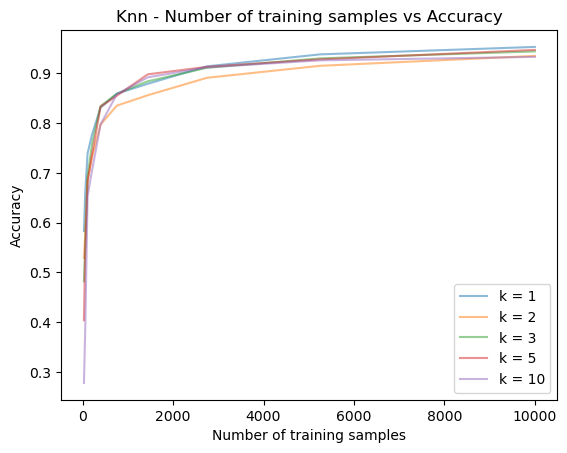

In [114]:
# Testing the knn classifier with all ks in [1, 2, 3, 5, 10], training image size varying from 30 to 10000, and 1000 test images
# Initialize plot
plt.title('Knn - Number of training samples vs Accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
# Initialize variables
training_size_list = np.logspace(start=np.log10(30), stop=4, num=10, dtype = int) # Training dataset size
k_list = [1, 2, 3, 5, 10] # List of all ks
for k in k_list:
    average_accuracy_list = [] # List of average accuracies for various training dataset sizes
    for training_size in training_size_list:
        acc_vec, avg_acc = kNN(images_train[0:training_size,], labels_train_1d[0:training_size], \
                               images_test[0:1000,], labels_test_1d[0:1000], k)
        average_accuracy_list.append(avg_acc)
    print('For k = ', k, ', test_size = 1000', ': Average accuracy list - ', average_accuracy_list)
    plt.plot(training_size_list, average_accuracy_list, label = 'k = ' + str(k), alpha=0.5)
    
# Render plot
plt.legend()
plt.show()

We see the output of our algorithm for various other Ks. Now we move to computing the best value of K in a given set of Ks using a validation set. This is cross validation to find the best hyperparamter.

Validation: k =  1 , accuracy =  0.881
Validation: k =  2 , accuracy =  0.866
Validation: k =  3 , accuracy =  0.882
Validation: k =  5 , accuracy =  0.873
Validation: k =  10 , accuracy =  0.858


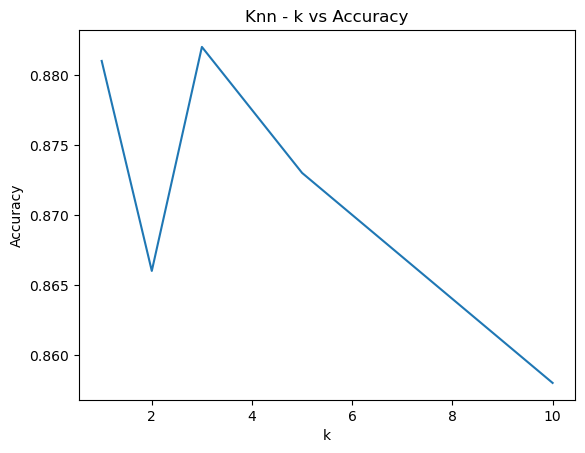

Accuracy on test data with k=  3  : Accuracy vector -  [1.         1.         0.78787879 0.86956522 0.85057471 0.86170213
 0.88372093 0.92241379 0.71134021 0.87254902] , Average accuracy -  0.878


In [223]:
# Finding the best k in [1, 2, 3, 5, 10] with randomly selected 2000 training samples and using the later half of it as a validation set.
# Finally we will report the accuracy with the best k on the test data.
# Initialize plot
plt.title('Knn - k vs Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Randomize the training data
indexes = np.random.permutation(images_train.shape[0])
images_train = images_train[indexes]
labels_train = labels_train[indexes]

# Changing label arrays to 1-D
labels_train_1d = labels_train.flatten()

# Initialize variables
best_k = -1 # Stores the best k
best_acc = 0 # Stores the best accuracy
acc_list = [] # Stores a list of accuracies for each k
k_list = [1, 2, 3, 5, 10] # List of all ks

for k in k_list:
    acc_vec, acc = kNN(images_train[0:1000,], labels_train_1d[0:1000], \
                               images_train[1000:2000,], labels_train_1d[1000:2000], k)
    acc_list.append(acc)
    print('Validation: k = ', k, ', accuracy = ', acc)
    if acc > best_acc: # Find best k
        best_k = k
        best_acc = acc

# Render plot
plt.plot(k_list, acc_list)
plt.show()

# Reporting accuracy on test data
acc_vec, acc = kNN(images_train[0:1000,], labels_train_1d[0:1000], \
                   images_test[0:1000,], labels_test_1d[0:1000], best_k)
print('Accuracy on test data with k= ',best_k,' : Accuracy vector - ', acc_vec, ', Average accuracy - ', acc)


We see that k=3 gives us the best average accuracy. Accuracy on the test data with this k is 0.878.